<h1 style="font-size: 40px; margin-bottom: 0px;">4.1 Modeling biological phenomena (Part III)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For today, we'll be continuing to practice modeling biological phenomena. We'll explore more complicated models and how to simulate a probabilistic phenomenon, such as the diffusion of a single molecule, and if you finish early, there is time to discuss the biological phenomenon that you want to model.

<strong>Learning objectives:</strong>
<ul>
    <li>Continue practicing for loops</li>
    <li>Continue to practice plotting</li>
    <li>Run simulations for steady-states</li>
    <li>Run simulations for probabilistic events</li>
</ul>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="font-size: 40px; margin-bottom: 0px;">Simulate mRNA dynamics</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Like with bacterial growth, we can also simulate the levels of mRNA. We know that mRNA is produced at some constant rate **r**. And we know that mRNA will have some rate of decay **gamma** that is dependent on the levels of mRNA (if there's no mRNA, then there's nothing to decay). So at some given time point **C(t+dt)**, we can model the levels of mRNA by taking into account the number of mRNA that we have **C(t)**, how many mRNA were made **(r times dt)**, and how many decayed **(gamma times dt times C(t))**.
```
C(t+dt) = C(t) + r*dt - gamma*dt*C(t)
```

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Simulate mRNA dynamics</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

Now see if you can work out a for loop that will allow you to simulate mRNA dynamics with the following parameters:
```
t_max = 200 #min
dt = 0.1 #min
r = 50 #mRNA made per min
gamma = 4 #rate of mRNA decay per min
mRNA_at_t0 = 5 #number of starting mRNA molecules
```

In [4]:
#initialize your constants
t_max = 200 #min
dt = 0.1 #min
r = 50 #mRNA made per min
gamma = 4 #rate of mRNA decay per min
mRNA_at_t0 = 5 #number of starting mRNA molecules

#I need three arrays - one for index (map for the for loop), one for time points, one for the mRNA levels
position_list = np.arange(0, int(t_max/dt) - 1, 1) #our index to give our for loop
time_points = np.zeros(int(t_max/dt)) #our x-axis values
mRNA_low = np.zeros(len(time_points)) #our array to hold our mRNA levels at each time point
mRNA_low[0] = mRNA_at_t0 #initialize the first value

#start up the for loop
for t in position_list:
    time_points[t + 1] = time_points[t] + dt #we're updating our x-axis values (each time point)
    mRNA_low[t + 1] = mRNA_low[t] + r*dt - gamma*dt*mRNA_low[t] #calculate the mRNA levels

Let's take a look at the plot of mRNA levels over time with these starting parameters.

Text(0.5, 0, 'time (min)')

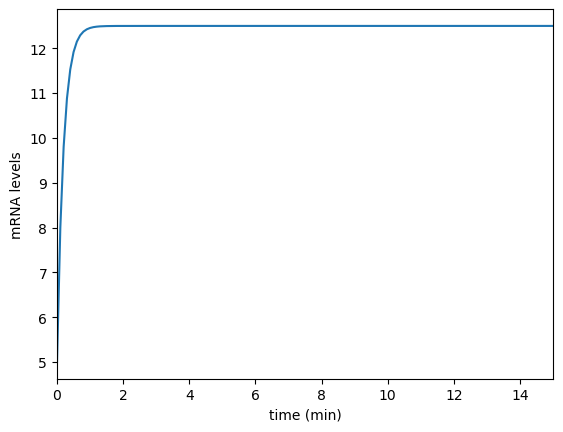

In [6]:
#plot our data as a lineplot using plt.plot()
plt.plot(time_points, mRNA_low) #we give it our x-axix (time) and the y-axis (mRNA levels)
plt.xlim(0, 15)
plt.ylabel('mRNA levels')
plt.xlabel('time (min)')

Now what if we have a starting mRNA number of 40? How does that change the dynamics of our mRNA?

In [8]:
#initialize our constants again
t_max = 200 #min
dt = 0.1 #min
r = 50 #mRNA made per min
gamma = 4 #rate of mRNA decay per min
mRNA_at_t0 = 40 #number of starting mRNA molecules

#I need three arrays - one for index (map for the for loop), one for time points, one for the mRNA levels
position_list = np.arange(0, int(t_max/dt) - 1, 1) #index
time_points = np.zeros(int(t_max/dt)) #x-values
mRNA_high = np.zeros(len(time_points)) #y-values
mRNA_high[0] = mRNA_at_t0 #first y-value

#start up the for loop
for t in position_list:
    time_points[t + 1] = time_points[t] + dt #calculate time points based on time step
    mRNA_high[t + 1] = mRNA_high[t] + r*dt - gamma*dt*mRNA_high[t] #calculate mRNA levels

Let's visualize the plot for when we have a higher starting mRNA level.

Text(0.5, 0, 'time (min)')

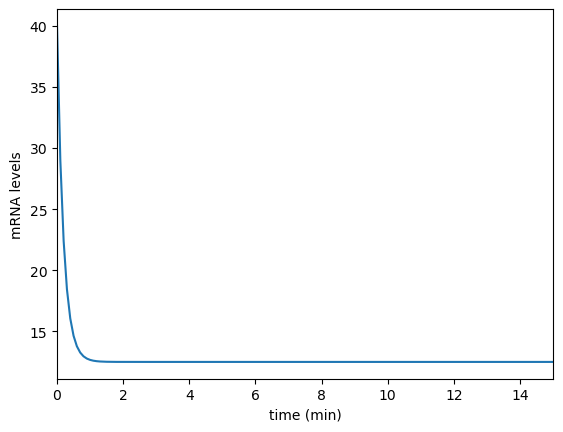

In [9]:
#plot a line plot
plt.plot(time_points, mRNA_high)
plt.xlim(0, 15)
plt.ylabel('mRNA levels')
plt.xlabel('time (min)')

Let's take a look at our two plots together.

Text(0.5, 0, 'time (min)')

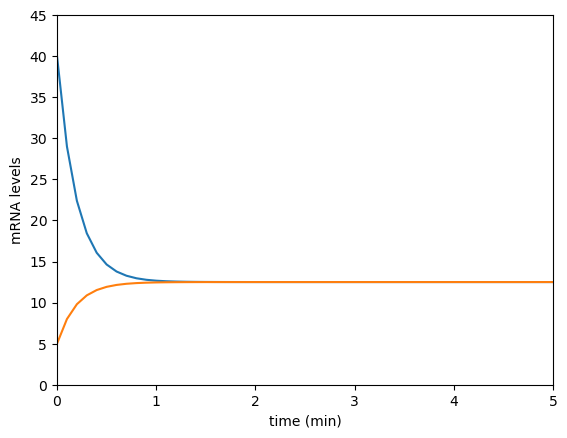

In [10]:
#plot both plots on the same plot
plt.plot(
    time_points, #give x-values
    mRNA_high,  #give y-values
    label='high' #give it a label
)
plt.plot(
    time_points, #x values
    mRNA_low, #y values
    label='low' #label
)

#specify plot characteristics
plt.xlim(0, 5)
plt.ylim(0, 45)
plt.ylabel('mRNA levels')
plt.xlabel('time (min)')

<h2><u>Challenge:</u> Simulate mRNA dynamics in response to an oscillating transcription factor</h2>

Let's try to come up with an ad hoc simulation of mRNA dynamics when mRNA is only produced once a transcription factor reaches some threshold concentration. For this, we can make use of the <mark style="background-color: #EEEEEE;"><strong>np.sin()</strong></mark> function to represent oscillating levels of a theoretical transcription factor.

We can make use of the following parameters:
```
t_max = 10 #sec
dt = 0.001 #sec
time_array = np.zeros(int(t_max/dt))
r = 30
c = 0.05 #efficiency of transcription factor binding and activation
gamma = 2
initial_tf_concentration = 20 #uM
```
And let's say the transcription factor has oscillates around its initial concentration at a pattern described by:
```
15*np.sin(2*time_array[i])
```
And only when the transcription factor reaches a threshold concentration of 30 uM does mRNA production occur.

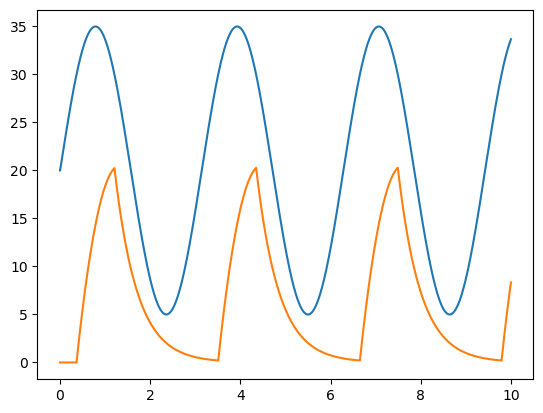

In [17]:
#initialize our constants
t_max = 10 #sec
dt = 0.001 #sec
r = 30
c = 0.05 #efficiency of transcription factor binding and activation
#the c is some ad hoc variable we use to factor in efficiency of transcriptional activation
gamma = 2
initial_tf_concentration = 20 #uM

#Now we'll need 4 arrays - because we are also tracking transcription factor levels
position_list = np.arange(0, int(t_max/dt)-1, 1) #index
time_array = np.zeros(int(t_max/dt)) #x values
tf_tracker = np.zeros(len(time_array)) #y values for our transcription factor
tf_tracker[0] = initial_tf_concentration #initialize first value for tf
mRNA_tracker = np.zeros(len(time_array)) #y values for our mRNA levels


#start up for loop
for t in position_list:
    time_array[t + 1] = time_array[t] + dt #update time
    tf_tracker[t + 1] = initial_tf_concentration + 15*np.sin(2*time_array[t]) #update tf levels that are oscillating (independent of mRNA)
    if tf_tracker[t] >= 30: #specify threshold condition
        mRNA_tracker[t + 1] = mRNA_tracker[t] + r*dt*tf_tracker[t]*c - gamma*dt*mRNA_tracker[t] #calculate mRNA levels
    else: #specify the condition when threshold is not met 
        mRNA_tracker[t + 1] = mRNA_tracker[t] - gamma*dt*mRNA_tracker[t] #there is only decay of mRNA if no mRNA is produced

#plot the arrays
plt.plot(time_array, tf_tracker, label='tf')
plt.plot(time_array, mRNA_tracker, label='mRNA')

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Simulating 1D diffusion via coin flips</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 900px;"></hr>

Diffusion can be modeled using a random walk, where we essentially "flip a coin" to determine whether our molecule moves in one direction or another. To do this, you can make use of either <mark style="background-color: #EEEEEE;"><strong>np.random.randint()</strong></mark> or a uniform random number generator from NumPy <mark style="background-color: #EEEEEE;"><strong>np.random.uniform()</strong></mark>. <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here</u></a>. 

For this set up, we're not interested tracking anything over multiple flips, we just want to see if we can control the position of a molecule with a random number generator (our coin flip).
```
position = 0
coin = np.random.uniform()
```
First, see if you can make use of an if-else statement to have your "molecule" have a 50% chance of moving either up or down by 1 based on the output of your random number generator.

In [23]:
#set up some variable that will change depending on the result of the coin flip
position = 0
#set up a random number generator for our coin flip
coin = np.random.uniform()

#specify condition under which molecule moves +1 or -1
if coin > 0.5:
    position = position + 1
else:
    position = position - 1

#re run cell to see how output changes
print('random result', coin, '\n', 'updated position:', position)

random result 0.4885567675917186 
 updated position: -1


Once you've worked out how to change the position of a molecule using an if-else statement, try to use this as a framework to set up a for loop, where now you have an array that tracks the position of your molecule for each flip (in other words, tracking the position of the molecule over time).

In [24]:
#initialize simulation parameters
number_of_flips = 5000 #how many times we flip our coin - how many times we will loop back
position_of_molecule = np.zeros(number_of_flips) #an array that will track the position of our molecule for each coin flip
position_of_molecule[0] = 0 #starting position is 0

#start up our for loop
for i in np.arange(0, number_of_flips-1, 1):
    #everytime the for loop repeats itself, the coin will flip again
    coin = np.random.uniform()
    #then we can determine where the molecule will move and track it for each flip
    if coin > 0.5:
        position_of_molecule[i + 1] = position_of_molecule[i] + 1
    else:
        position_of_molecule[i + 1] = position_of_molecule[i] - 1

Now let's plot the position of the molecule over each flip.

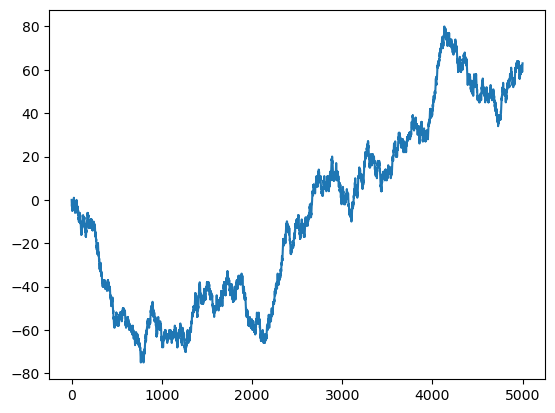

In [25]:
plt.plot(position_of_molecule)

<h2><u>Big Challenge:</u> Model multiple molecules at once</h2>

For this big challenge, see if you can figure out how to set up a <u>nested for loop</u> that will allow you to model the diffusion of multiple molecules at once with coin flips.

You'll need to set up in this case, a 2D array (a matrix) where each row corresponds to the position of a single molecule and each column corresponds to individual molecules. So the matrix will look something like this table:

<table>
    <tr style="background-color: transparent; border: none;">
        <td style="background-color: transparent; border: none;"></td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_1</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_2</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_3</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_4</td>
    </tr>
    <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_1</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_2</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_3</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_4</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_5</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
</table>

You can initialize a matrix of zeros by providing the <mark style="background-color: #EEEEEE;"><strong>np.zeros()</strong></mark> function with a list containing 2 elements, and it will generate a 2D array rather than a 1D array.
```
your_matrix_variable = np.zeros([number_of_rows, number_of_columns])
```

The logic of the nested for loop in this case is that for each single molecule, you want to proceed through each flip, and you want Python to be able track which molecule and which flip it is currently interating through.

In [26]:
#set up how many flips and how many molecules
number_of_flips = 20000
number_of_mol = 20
position_matrix = np.zeros([number_of_flips, number_of_mol])
#our array should now be 2D since we will need to not only track each molecule but everyone of their positions for each flip

print(position_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
#start up our for loops
for molecule in np.arange(0, number_of_mol, 1): #this will loop for each molecule
    for flip in np.arange(0, number_of_flips-1, 1): #this will loop for each coin flip
        coin = np.random.uniform()
        if coin > 0.5:
            position_matrix[flip + 1, molecule] = position_matrix[flip, molecule] + 1
        else:
            position_matrix[flip + 1, molecule] = position_matrix[flip, molecule] - 1
        #once we've calculated all the coin flips for one molecule
    #we will loop back to the next molecule and repeat all its coin flips
    #and then loop back to the following molecule and repeat

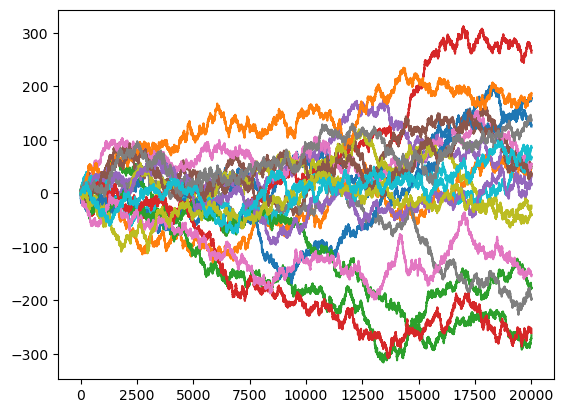

In [31]:
plt.plot(position_matrix);

Let's now try that with 200 different molecules.

In [32]:
number_of_flips = 20000
number_of_mol = 400
position_matrix = np.zeros([number_of_flips, number_of_mol])

for molecule in np.arange(0, number_of_mol, 1):
    for flip in np.arange(0, number_of_flips-1, 1):
        coin = np.random.uniform()
        if coin > 0.5:
            position_matrix[flip + 1, molecule] = position_matrix[flip, molecule] + 1
        else:
            position_matrix[flip + 1, molecule] = position_matrix[flip, molecule] - 1

Now let's take a look at how all the molecules look over time by reducing the transparency of our individual lines.

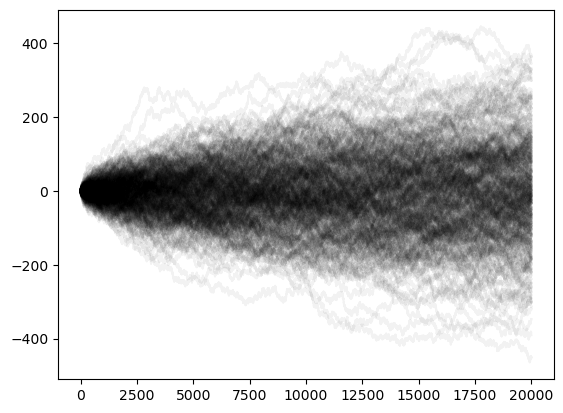

In [35]:
plt.plot(position_matrix, alpha=0.05, color='#000000');

How does the distribution of our molecules look at their final timepoint if we plot the data on a histogram?

<Axes: ylabel='Count'>

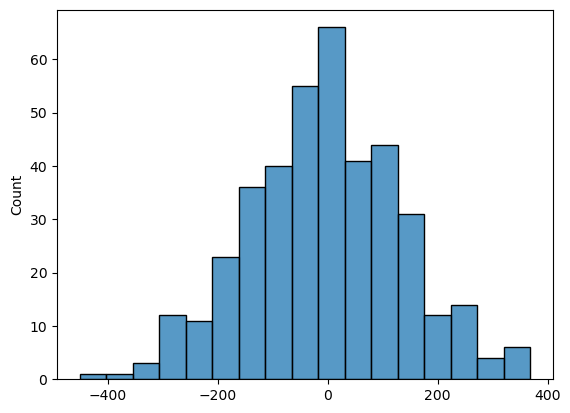

In [36]:
sns.histplot(position_matrix[-1, :])